In [1]:
import sys

sys.path.append('../')

from model_v2 import  *
from data import *
import os
import keras
import cv2
from keras.callbacks import TensorBoard
import tensorflow as tf
import keras.backend.tensorflow_backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train_path = "../640x400_small"
image_folder = "train"
label_folder = "trainannot"
valid_path =  "../640x400_small"
valid_image_folder ="val"
valid_label_folder = "valannot"
test_path = '../640x400_small/test/'
log_filepath = '../log'
flag_multi_class = True
num_classes = 4

dp = data_preprocess(
    train_path=train_path,image_folder=image_folder,label_folder=label_folder,
    valid_path=valid_path,valid_image_folder=valid_image_folder,valid_label_folder=valid_label_folder,
    flag_multi_class=flag_multi_class, num_classes=num_classes, 
    test_path=test_path, img_rows=640, img_cols=400, 
)

# train your own model
train_data = dp.trainGenerator(batch_size=2)
valid_data = dp.validLoad(batch_size=2)
test_data = dp.testGenerator()

model = unet(num_class=4, input_size=(640, 400, 3))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 640, 400, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 640, 400, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 640, 400, 16) 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxP

In [3]:
img = next(dp.testGenerator())

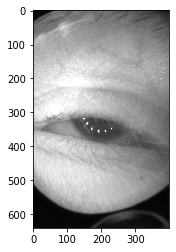

In [5]:
plt.imshow(img[0])

In [6]:
pred = model.predict(img)[0]

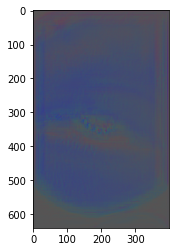

In [7]:
plt.imshow(pred)